## A brief odyssey into the openFDA dataset

### Setting up the Python environment

In [1]:
import requests
import pandas as pd

pd.set_option('display.max_colwidth', -1)

In [2]:
# helper function to flatten a list of lists

from collections import Iterable

def flatten(items):
    """ Yield items from any nested iterable """
    for x in items:
        if isinstance(x, Iterable) and not isinstance(x, (str, bytes)):
            yield from flatten(x)
        else:
            yield x

# Part A

Use the data from the OpenFDA API to determine the average number of ingredients (`spl_product_data_elements`) fpr a pharma company in medicines, per year.

In [3]:
# build a request to the openFDA API

max_requests = '100' # a small sample of the data for exploration during this exercise

pharma = str('"AstraZeneca"')

URL = str('https://api.fda.gov/drug/label.json?search=effective_time:[20180101+TO+20181231]+AND+spl_patient_package_insert:'+pharma+'AND+_exists_:spl_product_data_elements+AND+_exists_:openfda+&limit='+max_requests)

data = requests.get(URL).json()

In [4]:
# the data returned contains subset of 'meta' and 'result', for this exercise we're only interested in 'results'
data = data.get('results', [])

In [5]:
date = []
drug = []
ingredients = []
route = [] # for part B

In [6]:
len(data)

19

Extract the relevant sections from the json data returned by the API.

In [7]:
for i in range(0,len(data)):
    date.append(data[i]['effective_time'])
    drug.append(data[i]['openfda']['substance_name'])
    route.append(data[i]['openfda']['route']) # for part B
    ingredients.append(data[i]['spl_product_data_elements'])

The API returns ingredients in *spl_product_data_elements* as white space separated terms. For counting I am replacing the white space separation with comma and then transforming the list into a set in order to remove duplicates (see note below part A regarding this approach).

In [8]:
for i in range(0,len(data)):
    ingredients[i] = ingredients[i][0].split()
    ingredients[i] = list(set(ingredients[i]))

In [9]:
drug = flatten(drug) # flatten the list of lists of drug names.
drug = list(drug) #and return as 1 list of drugs names.

#for part B
route = flatten(route) #as above for list of delivery routes.
route = list(route)

Transfer the lists extracted from the json data into a Pandas dataframe for ease of viewing and processing

In [10]:
out = pd.DataFrame()
out['date'] = date
out['date'] = pd.to_datetime(out['date'])
out['drug'] = drug
out['route'] = route # for part B
out['ingredients'] = ingredients
out['count'] = out['ingredients'].apply(lambda x: len(str(x).split(',')))
out['year'] = out['date'].dt.year

In [11]:
out.head() # a quick inspection of the data

,date,drug,route,ingredients,count,year
0,2018-10-22,ROSUVASTATIN CALCIUM,ORAL,"[DIOXIDE, CROSPOVIDONE, OXIDE, CELLULOSE, Rosuvastatin, LACTOSE, MAGNESIUM, I;29, 5%), FERRIC, TRIACETIN, ROSUVASTATIN, MICROCRYSTALLINE, (15, Calcium, PHOSPHATE, CALCIUM, RED, ANHYDROUS, Biconvex, AT, HYPROMELLOSE, STEARATE, 2910, I;32, MPA.S, DIBASIC, MONOHYDRATE, MPA.S), TITANIUM]",30,2018
1,2018-12-20,ROSUVASTATIN CALCIUM,ORAL,"[calcium, UNSPECIFIED, DIOXIDE, TRIBASIC, CROSPOVIDONE, MONOHYDRATE, 10;crestor, OXIDE, CELLULOSE, Rosuvastatin, LACTOSE, MAGNESIUM, 5%), FERRIC, TRIACETIN, CRESTOR, biconvex, ROSUVASTATIN, MICROCRYSTALLINE, PHOSPHATE, (15, CALCIUM, RED, AT, STEARATE, MPA.S, HYPROMELLOSE,, TITANIUM]",29,2018
2,2018-12-01,ROSUVASTATIN CALCIUM,ORAL,"[DIOXIDE, CROSPOVIDONE, I;31, OXIDE, CELLULOSE, Rosuvastatin, LACTOSE, MAGNESIUM, I;29, I;30, 5%), FERRIC, TRIACETIN, ROSUVASTATIN, MICROCRYSTALLINE, (15, Calcium, PHOSPHATE, CALCIUM, RED, ANHYDROUS, Biconvex, AT, HYPROMELLOSE, STEARATE, 2910, I;32, MPA.S, DIBASIC, MONOHYDRATE, MPA.S), TITANIUM]",32,2018
3,2018-12-06,ROSUVASTATIN CALCIUM,ORAL,"[DIOXIDE, CROSPOVIDONE, OXIDE, CELLULOSE, Rosuvastatin, LACTOSE, MAGNESIUM, FERRIC, TRIACETIN, ROSUVASTATIN, MICROCRYSTALLINE, PHOSPHATE, Calcium, (15, CALCIUM, ANHYDROUS, RED, Biconvex, HYPROMELLOSE, STEARATE, 2910, I;32, DIBASIC, MONOHYDRATE, MPA.S), TITANIUM]",26,2018
4,2018-03-02,ZOLMITRIPTAN,ORAL,"[POLYETHYLENE, CITRIC, A, SODIUM, Z;5, TYPE, ZOLMITRIPTAN, DIOXIDE, flatfaced;, YELLOW, CROSPOVIDONE, Orally, (1600000, 8000, 400, OXIDE, CELLULOSE, MANNITOL, LACTOSE, MAGNESIUM, WATER, FERRIC, biconvex;, 5%), bevelled, WAMW), GLYCOL, ACID, STARCH, SILICON, MICROCRYSTALLINE, (15, filmcoated, GLYCOLATE, ANHYDROUS, RED, HYDROXYPROPYL, AT, BICARBONATE, ORANGE, STEARATE, ZOMIG;5, POTATO, ZOMIG;25, Z, Disintegrating, MPA.S, ASPARTAME, Zolmitriptan, TITANIUM]",50,2018


In [12]:
drug_list = out['drug'].tolist()

In [13]:
drug_list = set(drug_list) # remove duplicate drug names by passing through a set
drug_list = list(drug_list)

Prepare a final Pandas dataframe formatted as requested by the assignment, displaying the year (date), list of drug names, and the average number of ingredients.

In [14]:
out_final = pd.DataFrame()
out_final['date'] = out['year'].unique()
out_final['drug_names'] = str(drug_list)
out_final['avg_number_of_ingredients'] = round(out['count'].mean()) #calculate the average number of ingredients for the year

In [15]:
out_final

,date,drug_names,avg_number_of_ingredients
0,2018,"['BUDESONIDE', 'ESOMEPRAZOLE MAGNESIUM', 'ANASTROZOLE', 'CANDESARTAN CILEXETIL', 'ZOLMITRIPTAN', 'ROSUVASTATIN CALCIUM', 'OSIMERTINIB', 'BICALUTAMIDE', 'CICLESONIDE']",27.0


### Note!
The calculation of the average number of ingredients above is *woefully* inaccurate! The OpenFDA API returns a white spaced list of chemical names under spl_product_data_elements. An ontology of these names is required in order to correctly quantify them. Due to the time constraints of this exercise it is not possible to build such an ontology, therefore spaces between words were converted to comma separated strings in order to create a list of words with which to calculate an average number of entries per drug. At the time of writing, the author acknowledges that this is proof of concept only and is the average number of terms, and *not* the average number of chemical ingredients.

___

# Part B

Repeat the same analysis, calculate the average number of ingredients *per year and per delivery route* for all manufacturers. 

In [16]:
out_final2 = out.groupby([out['date'].dt.year, 'route'])['count'].mean().to_frame(name = 'avg_number_of_ingredients').reset_index()
out_final2.rename(columns={'date':'year'}, inplace=True)
out_final2

,year,route,avg_number_of_ingredients
0,2018,NASAL,5.0
1,2018,ORAL,31.5
2,2018,RESPIRATORY (INHALATION),6.0


Additional years could be retrived from the openFDA database by constructing a query as above but specifying a larger date range or for each specific year required. There is a limit of 100 requests per call to the API so a loop would need to be constructed to iteratively query the database across time periods involving >100 increments.

Due to the time and resource constraints of this assignmentt, 20x data points were retrived between January 1st and December 31st, 2018 to provide a proof of concept data analysis.

___

### How would you code a model to predict the number of ingredients for next year?

A linear regression model could be constructed from the counts of average number of ingredients obtained in part A. Such a model could then be used to predict number of ingredients for following years.

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
years = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

max_requests = '100' # a small sample of the data for exploration during this exercise
pharma = str('"AstraZeneca"')
out = []

for i in years:
    query_year = i
    URL = str('https://api.fda.gov/drug/label.json?search=effective_time:['+i+'0101+TO+'+i+'1231]+AND+spl_patient_package_insert:'+pharma+'AND+_exists_:spl_product_data_elements+AND+_exists_:openfda+&limit='+max_requests)
    data = requests.get(URL).json()
    out.append(data)

In [34]:
out = pd.DataFrame(out)
out = out.dropna(thresh=2) #drop bad data

In [35]:
data = out['results']

In [37]:
date = []
drug = []
ingredients = []

for i in range(0,len(data.index)):
    date.append(data.iloc[i][0]['effective_time'])
    drug.append(data.iloc[i][0]['openfda']['substance_name'])
    route.append(data.iloc[i][0]['openfda']['route']) # for part B
    ingredients.append(data.iloc[i][0]['spl_product_data_elements'])


for i in range(0,len(data.index)):
    ingredients[i] = ingredients[i][0].split()
    ingredients[i] = list(set(ingredients[i]))
    
drug = flatten(drug) # flatten the list of lists of drug names.
drug = list(drug) #and return as 1 list of drugs names.

out = pd.DataFrame()
out['date'] = date
out['date'] = pd.to_datetime(out['date'])
out['drug'] = drug
out['ingredients'] = ingredients
out['count'] = out['ingredients'].apply(lambda x: len(str(x).split(',')))
out['year'] = out['date'].dt.year

In [38]:
out

,date,drug,ingredients,count,year
0,2009-06-24,BUDESONIDE,"[light, DIOXIDE, grey, POLYSORBATE, OXIDE, TALC, GELATIN, FERRIC, METHACRYLIC, ACID, SILICON, ENTOCORT;EC;3;mg, CITRATE, TRIETHYL, ACETYLTRIBUTYL, RED, COLLOIDAL, 80, Budesonide, ENTOCORTEC, BUDESONIDE, opaque, FERROSOFERRIC, YELLOW, TITANIUM]",25,2009
1,2011-09-06,BUDESONIDE,"[PULMICORTFLEXHALER, LACTOSE, BUDESONIDE, Budesonide]",4,2011
2,2013-10-10,CILOSTAZOL,"[CORN, POVIDONES, CELLULOSE,, TEVA;7231, STEARATE, SILICON, DIOXIDE, off-white, white, CILOSTAZOL, CROSPOVIDONE, MICROCRYSTALLINE, MAGNESIUM, Cilostazol, STARCH,, to]",18,2013
3,2014-05-02,ANASTROZOLE,"[POLYETHYLENE, A, letter, SODIUM, UNSPECIFIED, of, an, TYPE, DIOXIDE, 300, extended, to, ANASTROZOLE, right, ARIMIDEX, a, attached, MAGNESIUM, arrowhead, adx1, with, case), GLYCOL, FORM, LACTOSE,, STARCH, (upper, the, leg, GLYCOLATE, Anastrozole, POVIDONE,, foot, STEARATE, POTATO, logo, HYPROMELLOSE,, TITANIUM, consisting]",42,2014
4,2016-07-05,CANDESARTAN CILEXETIL,"[POLYETHYLENE, light, UNSPECIFIED, GLYCOL,, off-white, shaped, to, ACH;016, pink, (1600000, CILEXETIL, OXIDE, CELLULOSE, LACTOSE, MAGNESIUM, circular, CORN, FERRIC, biconvex, WAMW), ACL;032, biconvex-shaped, CALCIUM, STARCH,, CARBOXYMETHYLCELLULOSE, RED, Candesartan, HYDROXYPROPYL, biconvex-sharped, ACF;004, cilexetil, STEARATE, white, circular;, CANDESARTAN, MONOHYDRATE, ACG;008]",39,2016
5,2017-05-22,ROSUVASTATIN CALCIUM,"[calcium, UNSPECIFIED, DIOXIDE, TRIBASIC, CROSPOVIDONE, MONOHYDRATE, 10;crestor, OXIDE, CELLULOSE, Rosuvastatin, LACTOSE, MAGNESIUM, 5%), FERRIC, TRIACETIN, CRESTOR, biconvex, ROSUVASTATIN, MICROCRYSTALLINE, PHOSPHATE, (15, CALCIUM, RED, AT, STEARATE, MPA.S, HYPROMELLOSE,, TITANIUM]",29,2017
6,2018-10-22,ROSUVASTATIN CALCIUM,"[DIOXIDE, CROSPOVIDONE, OXIDE, CELLULOSE, Rosuvastatin, LACTOSE, MAGNESIUM, I;29, 5%), FERRIC, TRIACETIN, ROSUVASTATIN, MICROCRYSTALLINE, (15, Calcium, PHOSPHATE, CALCIUM, RED, ANHYDROUS, Biconvex, AT, HYPROMELLOSE, STEARATE, 2910, I;32, MPA.S, DIBASIC, MONOHYDRATE, MPA.S), TITANIUM]",30,2018
7,2019-03-21,ROSUVASTATIN CALCIUM,"[DIOXIDE, CROSPOVIDONE, OXIDE, CELLULOSE, Rosuvastatin, LACTOSE, MAGNESIUM, 5%), FERRIC, TRIACETIN, ROSUVASTATIN, MICROCRYSTALLINE, (15, Calcium, PHOSPHATE, CALCIUM, RED, ANHYDROUS, Biconvex, AT, HYPROMELLOSE, STEARATE, 2910, I;32, MPA.S, DIBASIC, MONOHYDRATE, MPA.S), TITANIUM]",29,2019


For the purposes of this exercise, a synthetic data set was constructed, simulating 20 years of counts of average number of ingredients per year, similar to that extracted from openFDA in part A.

In [39]:
x_dat = list(out['year'])
y_dat = list(out['count'])
x_dat, y_dat

([2009, 2011, 2013, 2014, 2016, 2017, 2018, 2019],
 [25, 4, 18, 42, 39, 29, 30, 29])

Text(0, 0.5, 'count')

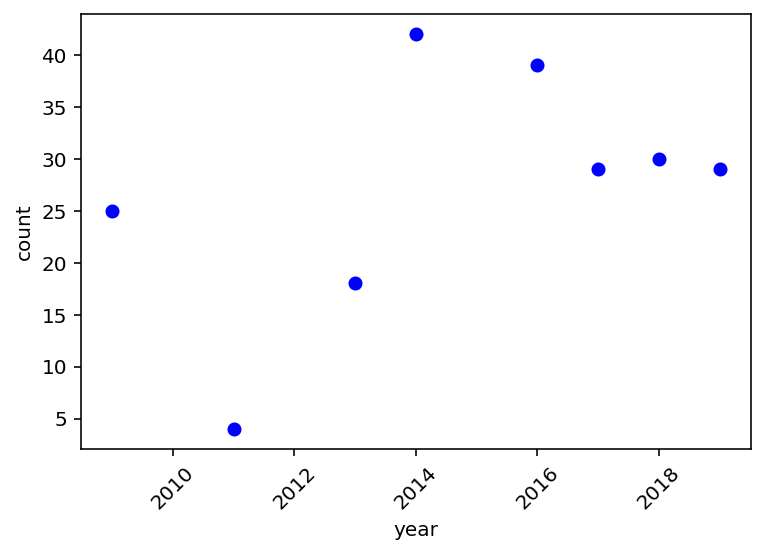

In [40]:
# a quick plot of the synthetic data set
plt.scatter(x_dat, y_dat,  color='blue');
plt.xticks(rotation=45)
plt.xlabel('year')
plt.ylabel('count')

In [41]:
# import required machine learning libraries
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb

In [42]:
x_dat_enc = LabelEncoder().fit_transform(x_dat) #one hot encoding of the categorical year labels
x_dat_enc = x_dat_enc.reshape(-1, 1)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x_dat_enc, y_dat, test_size=0.2)

In [44]:
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [45]:
# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'min_data': 1,
    'random_seed': 7448
}

evals_result = {} # to record eval results for plotting

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=lgb_eval,
                early_stopping_rounds=5,
                evals_result=evals_result)

print('Starting predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# eval
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

Starting training...
[1]	valid_0's l1: 5.98333	valid_0's l2: 52.0681
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 5.9675	valid_0's l2: 52.1353
[3]	valid_0's l1: 5.95246	valid_0's l2: 52.2015
[4]	valid_0's l1: 5.93817	valid_0's l2: 52.2664
[5]	valid_0's l1: 5.92459	valid_0's l2: 52.3301
[6]	valid_0's l1: 5.77836	valid_0's l2: 49.7375
[7]	valid_0's l1: 5.63945	valid_0's l2: 47.3357
[8]	valid_0's l1: 5.50747	valid_0's l2: 45.109
[9]	valid_0's l1: 5.3821	valid_0's l2: 43.0434
[10]	valid_0's l1: 5.26299	valid_0's l2: 41.1259
[11]	valid_0's l1: 5.28318	valid_0's l2: 41.7086
[12]	valid_0's l1: 5.30235	valid_0's l2: 42.2675
[13]	valid_0's l1: 5.32057	valid_0's l2: 42.8034
[14]	valid_0's l1: 5.33787	valid_0's l2: 43.3169
[15]	valid_0's l1: 5.35431	valid_0's l2: 43.8087
Early stopping, best iteration is:
[10]	valid_0's l1: 5.26299	valid_0's l2: 41.1259
Starting predicting...
The rmse of prediction is: 6.412947861244541


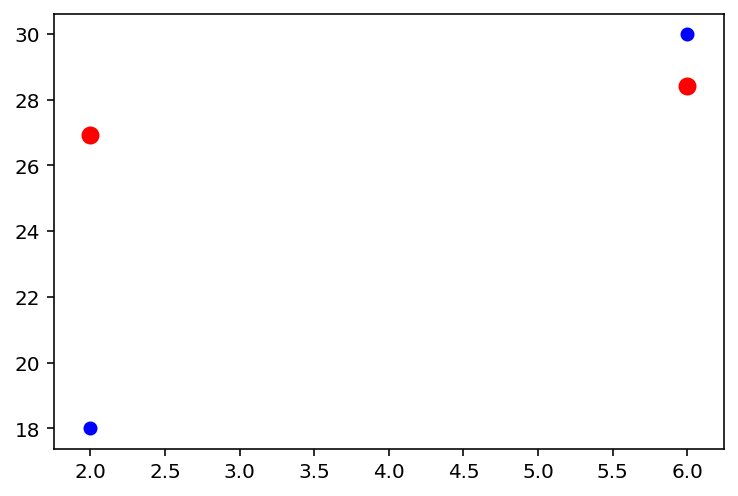

In [46]:
# Plot the model predictions vs test data
plt.scatter(X_test, y_test,  color='blue') # test data in blue
plt.scatter(X_test, y_pred, color='red', linewidth=3) # predictions in red

plt.show()

In [47]:
new_year = np.array([[21]]) # make a prediction for 2020.
new_pred = gbm.predict(new_year, num_iteration=gbm.best_iteration)
print('The average number of ingredients predicted for the year 2020 =',round(list(new_pred)[0]))

The average number of ingredients predicted for the year 2020 = 28.0
